In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Assuming you have both files in your working directory or specify their paths
matches_file = r"C:\Users\Ananya\Desktop\matches.csv"
deliveries_file = r"C:\Users\Ananya\Desktop\deliveries.csv"

# Load datasets into Pandas DataFrames
matches = pd.read_csv(matches_file)
deliveries = pd.read_csv(deliveries_file)


In [7]:
print("Matches Dataset:")
print(matches.head())

print("\nDeliveries Dataset:")
print(deliveries.head())


Matches Dataset:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrise

In [8]:
# Merge matches and deliveries datasets on 'match_id'
merged_data = pd.merge(matches, deliveries, left_on='id', right_on='match_id')

# Display merged data to verify
print("\nMerged Dataset:")
print(merged_data.head())



Merged Dataset:
   id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
2   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
3   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
4   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied  ... bye_runs  legbye_runs  noball_runs penalty_runs  \
0  normal           0  ...        0            0            0            0 

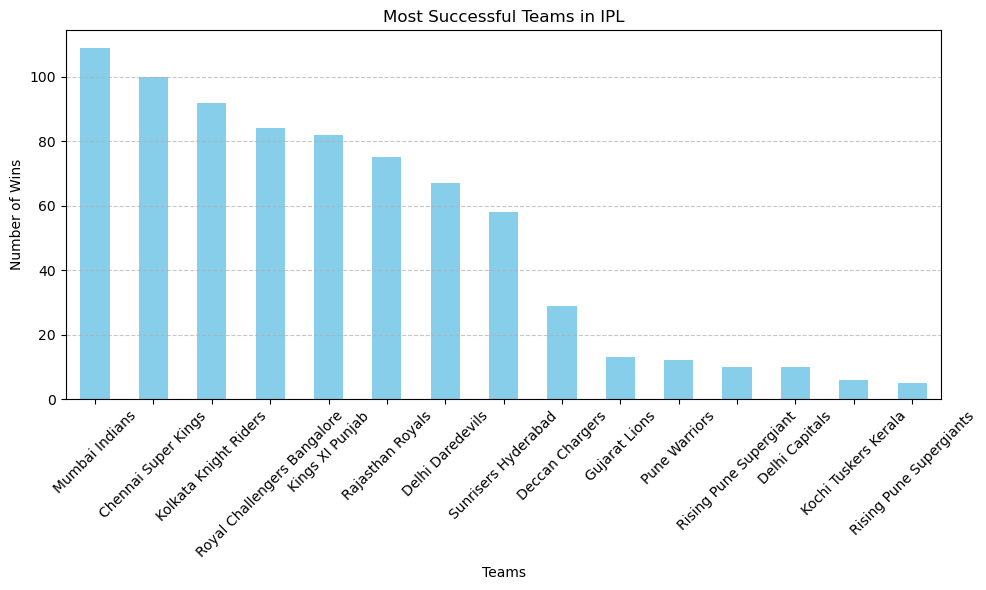

In [9]:
# Calculate number of matches won by each team
team_wins = matches['winner'].value_counts()

# Plotting the most successful teams
plt.figure(figsize=(10, 6))
team_wins.plot(kind='bar', color='skyblue')
plt.title('Most Successful Teams in IPL')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


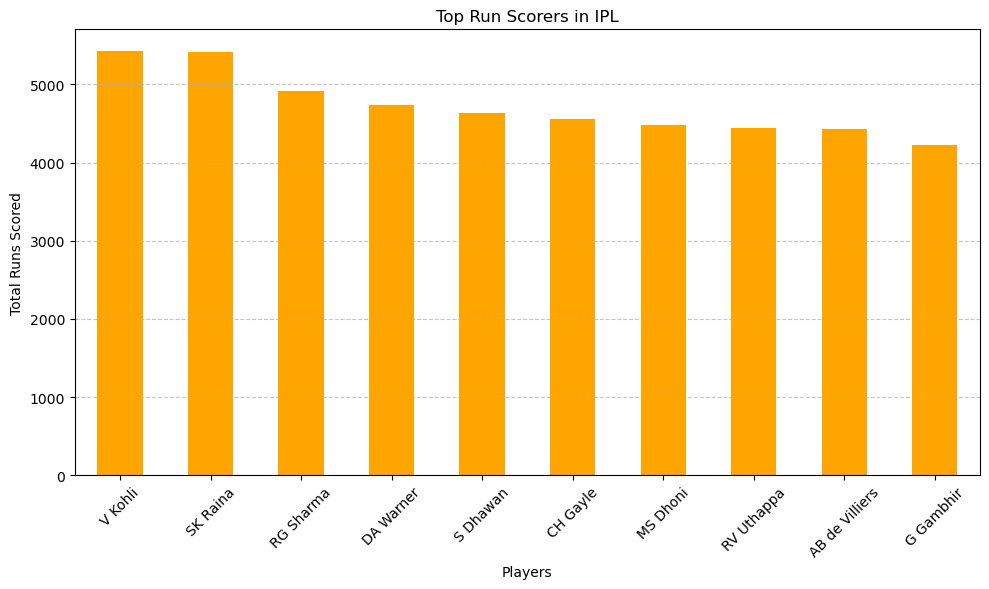

In [10]:
# Calculate top run-scorers
top_scorers = merged_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_scorers.plot(kind='bar', color='orange')
plt.title('Top Run Scorers in IPL')
plt.xlabel('Players')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
# Example: Recommend top players for endorsements based on performance metrics
top_players = top_scorers.index.tolist()[:5]
print("Recommended players for endorsements:", top_players)


Recommended players for endorsements: ['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan']


<Figure size 1200x800 with 0 Axes>

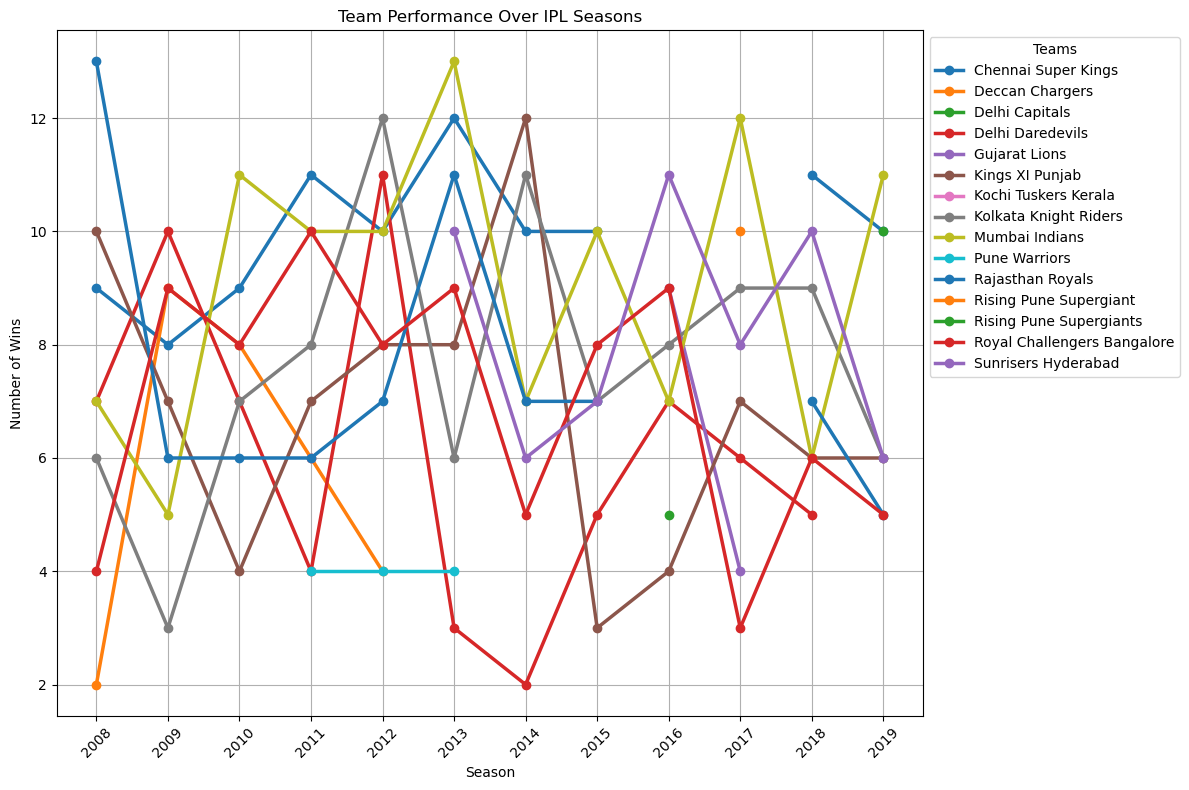

In [12]:
# Calculate number of wins per season for each team
team_season_wins = matches.groupby(['season', 'winner']).size().unstack()

# Plotting team performance over seasons
plt.figure(figsize=(12, 8))
team_season_wins.plot(kind='line', marker='o', linewidth=2.5, figsize=(12, 8))
plt.title('Team Performance Over IPL Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.xticks(team_season_wins.index, rotation=45)
plt.grid(True)
plt.legend(title='Teams', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


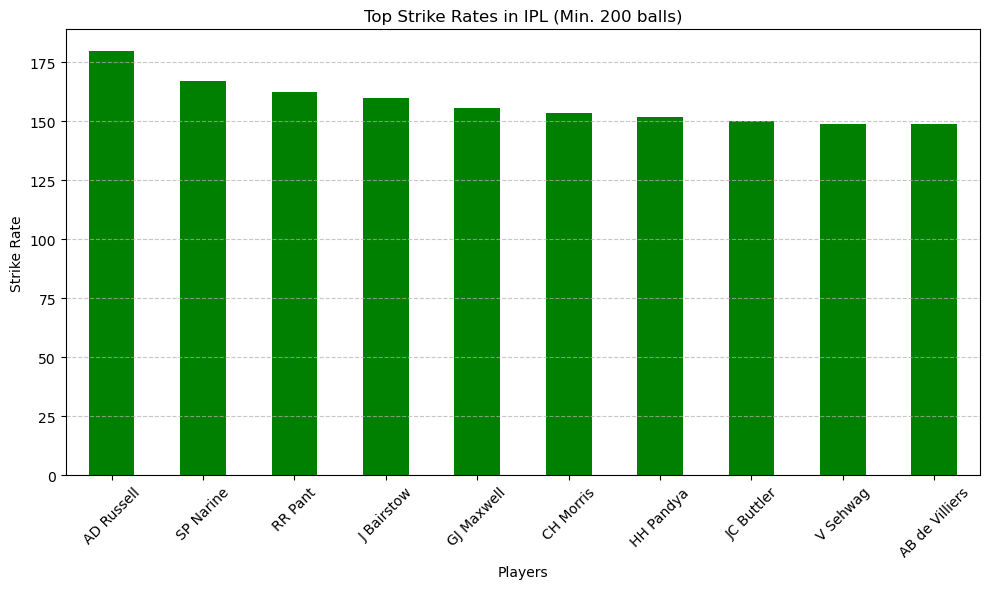

In [13]:
# Calculate batsman strike rates
player_strike_rates = merged_data.groupby('batsman')['batsman_runs'].sum() / merged_data.groupby('batsman')['ball'].count() * 100

# Filter out players with fewer than 200 balls faced for relevance
qualified_players = player_strike_rates[merged_data.groupby('batsman')['ball'].count() > 200].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
qualified_players.plot(kind='bar', color='green')
plt.title('Top Strike Rates in IPL (Min. 200 balls)')
plt.xlabel('Players')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


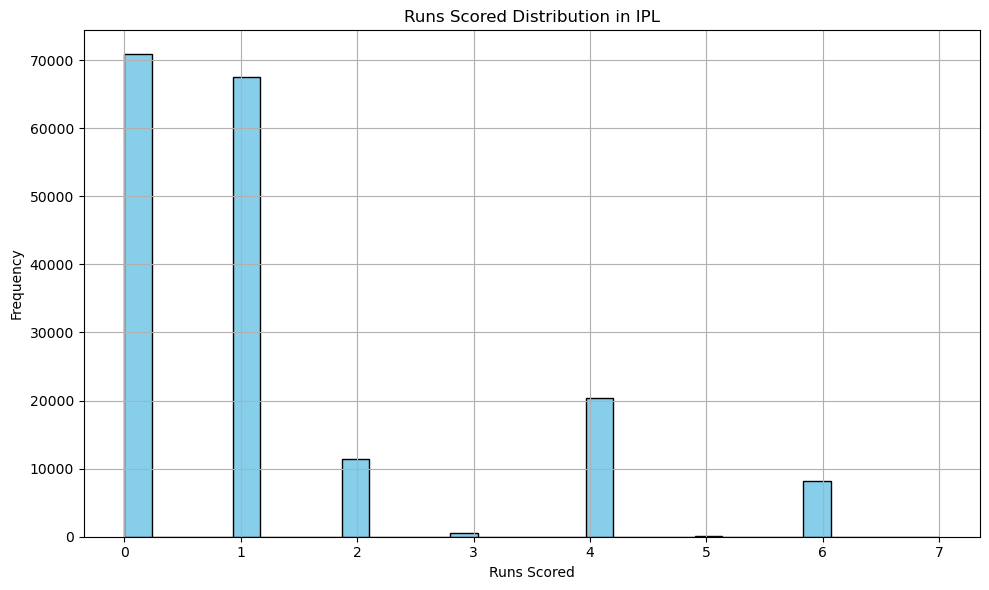

In [14]:
# Visualize runs scored distribution using histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_data['batsman_runs'], bins=30, color='skyblue', edgecolor='black')
plt.title('Runs Scored Distribution in IPL')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


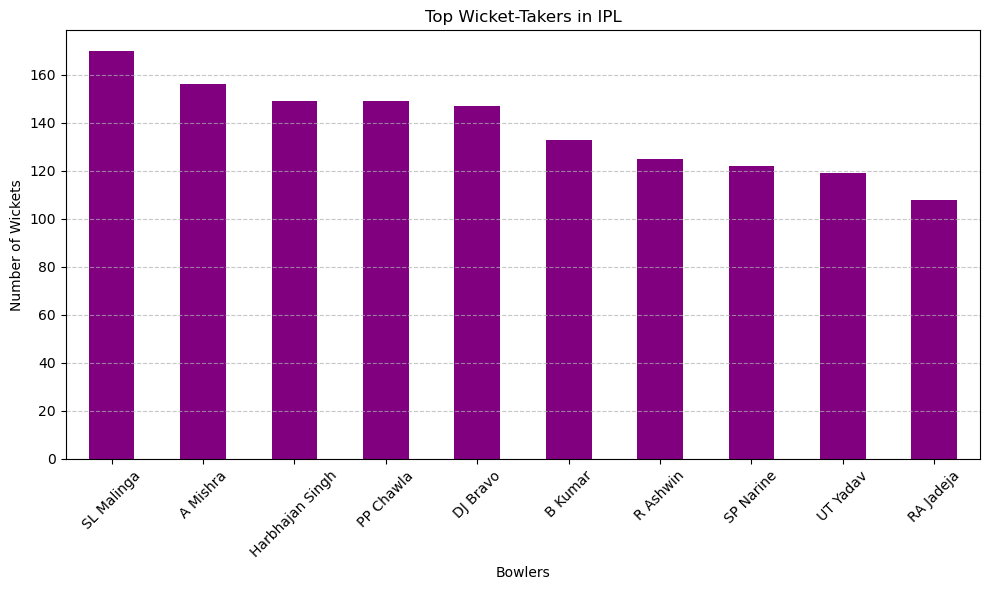

In [15]:
# Calculate top wicket-takers
top_bowlers = merged_data[merged_data['dismissal_kind'].isin(['bowled', 'caught', 'lbw', 'caught and bowled', 'stumped'])]
top_bowlers = top_bowlers.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_bowlers.plot(kind='bar', color='purple')
plt.title('Top Wicket-Takers in IPL')
plt.xlabel('Bowlers')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


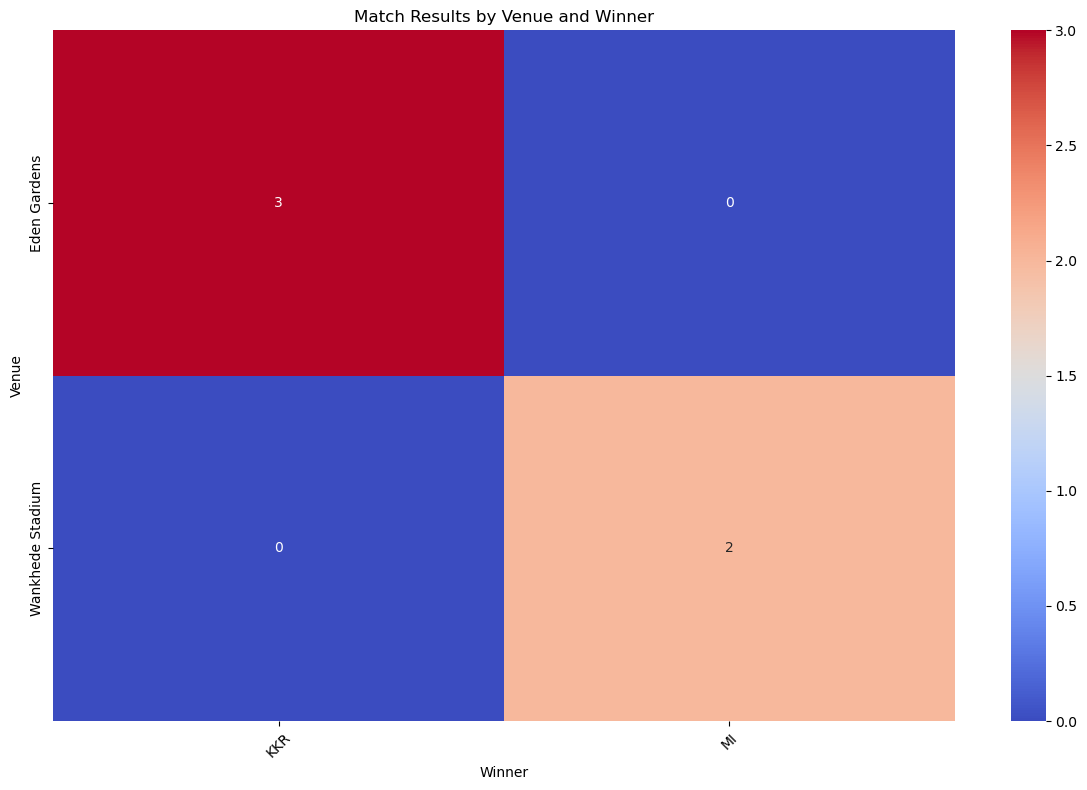

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for enhanced visualizations

# Assuming you have loaded and merged matches and deliveries datasets as 'merged_data'

# Create a sample dataset for demonstration
matches = pd.DataFrame({
    'venue': ['Eden Gardens', 'Wankhede Stadium', 'Eden Gardens', 'Wankhede Stadium', 'Eden Gardens'],
    'winner': ['KKR', 'MI', 'KKR', 'MI', 'KKR']
})

# Create crosstab of match results by venue and winner
venue_wins = pd.crosstab(matches['venue'], matches['winner'])

# Plotting the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(venue_wins, cmap='coolwarm', annot=True, fmt='d')
plt.title('Match Results by Venue and Winner')
plt.xlabel('Winner')
plt.ylabel('Venue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
